In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
#package imports
import matplotlib.pyplot as plt

import pandas as pd
from pandas import unique

from joblib import Parallel, delayed
import multiprocessing

from random import shuffle
from sklearn.metrics import mean_absolute_error,mean_squared_error

# CO2RR Plotting

In [21]:
co2rr = pd.read_csv('CO2RR/prediction_results_test_set.csv')
ids=[]
target=[]
pred=[]
ads=[]
for i in range(co2rr.shape[0]):
    line = co2rr.iloc[i]
    
    ids.append(line['id'])
    target.append(line['target'])
    pred.append(line['prediction'])
    
    if 'CHO' in line['id']:
        ads.append('CHO')
    elif 'COOH' in line['id']:
        ads.append('COOH')
    else:
        ads.append('CO')
d ={'id':ids,'target':target,'prediction':pred,'ads':ads}
co2rr=pd.DataFrame(d)

CO = pd.read_csv('CO/prediction_results_test_set.csv')


CHO = pd.read_csv('CHO/prediction_results_test_set.csv')


COOH = pd.read_csv('COOH/prediction_results_test_set.csv')

print('CO:')
print(CO.shape)
print('-----------')
print('CHO:')
print(CHO.shape)
print('-----------')
print('COOH:')
print(COOH.shape)
print('-----------')

print('CO MAE: ' + str(mean_absolute_error(CO['target'], CO['prediction']))[:5])
print('CHO MAE: ' + str(mean_absolute_error(CHO['target'], CHO['prediction']))[:5])
print('COOH MAE: ' + str(mean_absolute_error(COOH['target'], COOH['prediction']))[:5])
print('Combined MAE: ' + str(mean_absolute_error(co2rr['target'], co2rr['prediction']))[:5])

CO:
(14, 3)
-----------
CHO:
(20, 3)
-----------
COOH:
(26, 3)
-----------
CO MAE: 0.084
CHO MAE: 0.090
COOH MAE: 0.066
Combined MAE: 0.064


In [22]:
print('CO RMSE: ' + str(mean_squared_error(CO['target'], CO['prediction'],squared=False))[:5])
print('CHO RMSE: ' + str(mean_squared_error(CHO['target'], CHO['prediction'],squared=False))[:5])
print('COOH RMSE: ' + str(mean_squared_error(COOH['target'], COOH['prediction'],squared=False))[:5])
print('Combined RMSE: ' + str(mean_squared_error(co2rr['target'], co2rr['prediction'],squared=False))[:5])

CO RMSE: 0.110
CHO RMSE: 0.112
COOH RMSE: 0.091
Combined RMSE: 0.086


In [23]:
preds = CO['prediction']
reals = CO['target']
subs = abs(preds - reals)
CO_std= np.std(subs)

preds = CHO['prediction']
reals = CHO['target']
subs = abs(preds - reals)
CHO_std= np.std(subs)

preds = COOH['prediction']
reals = COOH['target']
subs = abs(preds - reals)
COOH_std= np.std(subs)

preds = co2rr['prediction']
reals = co2rr['target']
subs = abs(preds - reals)
co2rr_std= np.std(subs)

print(CO_std,CHO_std,COOH_std,co2rr_std)

#CO std lines --------------------
x = [-4,4]
y = [-4-CO_std,4-CO_std]
hue=['low','low']
d1 = {'x':x,'lines': y,'hue':hue}
df1 = pd.DataFrame(data=d1)

x = [-4,4]
y = [-4+CO_std,4+CO_std]
hue=['up','up']
d2 = {'x':x,'lines': y,'hue':hue}
df2 = pd.DataFrame(data=d2)
#---------------------------------

#CHO std lines --------------------
x = [-4,4]
y = [-4-CHO_std,4-CHO_std]
hue=['low','low']
d1 = {'x':x,'lines': y,'hue':hue}
df3 = pd.DataFrame(data=d1)

x = [-4,4]
y = [-4+CHO_std,4+CHO_std]
hue=['up','up']
d2 = {'x':x,'lines': y,'hue':hue}
df4 = pd.DataFrame(data=d2)
#---------------------------------

#COOH std lines --------------------
x = [-4,4]
y = [-4-COOH_std,4-COOH_std]
hue=['low','low']
d1 = {'x':x,'lines': y,'hue':hue}
df5 = pd.DataFrame(data=d1)

x = [-4,4]
y = [-4+COOH_std,4+COOH_std]
hue=['up','up']
d2 = {'x':x,'lines': y,'hue':hue}
df6 = pd.DataFrame(data=d2)
#---------------------------------

#CO2RR std lines --------------------
x = [-4,4]
y = [-4-co2rr_std,4-co2rr_std]
hue=['low','low']
d1 = {'x':x,'lines': y,'hue':hue}
df7 = pd.DataFrame(data=d1)

x = [-4,4]
y = [-4+co2rr_std,4+co2rr_std]
hue=['up','up']
d2 = {'x':x,'lines': y,'hue':hue}
df8 = pd.DataFrame(data=d2)
#---------------------------------

0.07084952200708665 0.06777328900496123 0.06294693437169421 0.05723573822317334


In [19]:
!pwd

/Users/zach/Desktop/4_fall2_UofT/GNN/Line_GNN_work/plotting/small


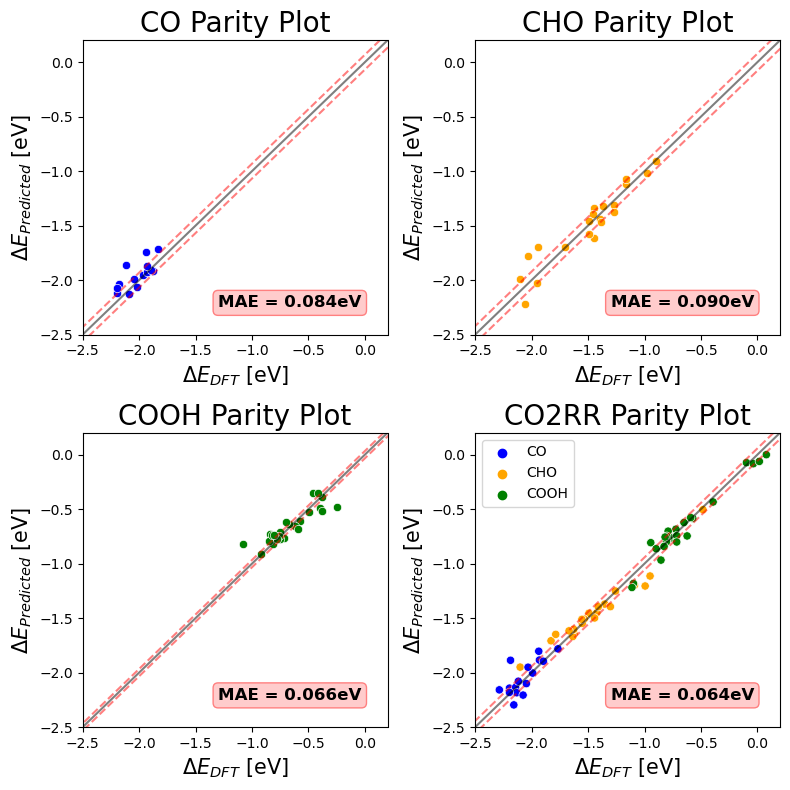

In [284]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

#sns.set(font_scale = 1.5)

x1=sns.scatterplot(ax=axes[0,0],data=CO, x='target',y='prediction',marker='o', color='blue')
x1.set(xlim=(-2.5,0.2))
x1.set(ylim=(-2.5,0.2))
x1.plot([-4,4],[-4,4],color='black',alpha=0.5) 
x1=sns.lineplot(ax=axes[0,0],x='x',y='lines',data=df1,color='red',alpha  = 0.5)
x1.lines[1].set_linestyle("--")
x1=sns.lineplot(ax=axes[0,0],x='x',y='lines',data=df2,color='red',alpha  = 0.5)
x1.lines[2].set_linestyle("--")
x1.set_xlabel("$\Delta E_{DFT}$ [eV]", fontsize = 15)
x1.set_ylabel("$\Delta E_{Predicted}$ [eV]", fontsize = 15)
x1.set_title("CO Parity Plot", fontsize = 20)
x1.text(-1.3,-2.25,'MAE = 0.084eV',
        fontsize=12,bbox=dict(boxstyle="round",ec=(1., 0.5, 0.5),
                              fc=(1., 0.8, 0.8)),
        weight='semibold')

x2=sns.scatterplot(ax=axes[0,1],data=CHO, x='target',y='prediction',marker='o', color='orange')
x2.set(xlim=(-2.5,0.2))
x2.set(ylim=(-2.5,0.2))
x2.plot([-4,4],[-4,4],color='black',alpha=0.5) 
x2=sns.lineplot(ax=axes[0,1],x='x',y='lines',data=df3,color='red',alpha  = 0.5)
x2.lines[1].set_linestyle("--")
x2=sns.lineplot(ax=axes[0,1],x='x',y='lines',data=df4,color='red',alpha  = 0.5)
x2.lines[2].set_linestyle("--")
x2.set_xlabel("$\Delta E_{DFT}$ [eV]", fontsize = 15)
x2.set_ylabel("$\Delta E_{Predicted}$ [eV]", fontsize = 15)
x2.set_title("CHO Parity Plot", fontsize = 20)
x2.text(-1.3,-2.25,'MAE = 0.090eV',
        fontsize=12,bbox=dict(boxstyle="round",ec=(1., 0.5, 0.5),
                              fc=(1., 0.8, 0.8)),
        weight='semibold')

x3=sns.scatterplot(ax=axes[1,0],data=COOH, x='target',y='prediction',marker='o', color='green')
x3.set(xlim=(-2.5,0.2))
x3.set(ylim=(-2.5,0.2))
x3.plot([-4,4],[-4,4],color='black',alpha=0.5) 
x3=sns.lineplot(ax=axes[1,0],x='x',y='lines',data=df5,color='red',alpha  = 0.5)
x3.lines[1].set_linestyle("--")
x3=sns.lineplot(ax=axes[1,0],x='x',y='lines',data=df6,color='red',alpha  = 0.5)
x3.lines[2].set_linestyle("--")
x3.set_xlabel("$\Delta E_{DFT}$ [eV]", fontsize = 15)
x3.set_ylabel("$\Delta E_{Predicted}$ [eV]", fontsize = 15)
x3.set_title("COOH Parity Plot", fontsize = 20)
x3.text(-1.3,-2.25,'MAE = 0.066eV',
        fontsize=12,bbox=dict(boxstyle="round",ec=(1., 0.5, 0.5),
                              fc=(1., 0.8, 0.8)),
        weight='semibold')

x4=sns.scatterplot(ax=axes[1,1],data=co2rr, x='target',y='prediction',hue='ads',
                   hue_order=['CO','CHO','COOH'],
                   palette=['blue','orange','green'],                   
                   marker='o', color='b')
x4.set(xlim=(-2.5,0.2))
x4.set(ylim=(-2.5,0.2))
x4.plot([-4,4],[-4,4],color='black',alpha=0.5) 
x4=sns.lineplot(ax=axes[1,1],x='x',y='lines',data=df7,color='red',alpha  = 0.5)
x4.lines[1].set_linestyle("--")
x4=sns.lineplot(ax=axes[1,1],x='x',y='lines',data=df8,color='red',alpha  = 0.5)
x4.lines[2].set_linestyle("--")
x4.set_xlabel("$\Delta E_{DFT}$ [eV]", fontsize = 15)
x4.set_ylabel("$\Delta E_{Predicted}$ [eV]", fontsize = 15)
x4.set_title("CO2RR Parity Plot", fontsize = 20)
x4.text(-1.3,-2.25,'MAE = 0.064eV',
        fontsize=12,bbox=dict(boxstyle="round",ec=(1., 0.5, 0.5),
                              fc=(1., 0.8, 0.8)),
        weight='semibold')
plt.tight_layout()
plt.savefig('CO2RR_fig_new')

# ORR Plotting

In [46]:
ORR = pd.read_csv('O_OH/prediction_results_test_set.csv')
ids=[]
target=[]
pred=[]
ads=[]
for i in range(ORR.shape[0]):
    line = ORR.iloc[i]
    
    ids.append(line['id'])
    target.append(line['target'])
    pred.append(line['prediction'])
    
    if 'OH' in line['id']:
        ads.append('OH')
    elif 'O' in line['id']:
        ads.append('O')
d ={'id':ids,'target':target,'prediction':pred,'ads':ads}
ORR=pd.DataFrame(d)
print(ORR.shape,classes.shape)

OH = pd.read_csv('OH/prediction_results_test_set.csv')


O = pd.read_csv('O/prediction_results_test_set.csv')


print('OH:')
print(OH.shape)
print('-----------')
print('O:')
print(O.shape)


print('OH MAE: ' + str(mean_absolute_error(OH['target'], OH['prediction']))[:5])
print('O MAE: ' + str(mean_absolute_error(O['target'], O['prediction']))[:5])

print('Combined MAE: ' + str(mean_absolute_error(ORR['target'], ORR['prediction']))[:5])

(160, 4) (617, 2)
OH:
(87, 3)
-----------
O:
(100, 3)
OH MAE: 0.031
O MAE: 0.047
Combined MAE: 0.043


In [37]:
print('OH MAE: ' + str(mean_squared_error(OH['target'], OH['prediction'],squared=False))[:5])
print('O MAE: ' + str(mean_squared_error(O['target'], O['prediction'],squared=False))[:5])

OH MAE: 0.041
O MAE: 0.059


In [47]:
preds = O['prediction']
reals = O['target']
subs = abs(preds - reals)
O_std= np.std(subs)

preds = OH['prediction']
reals = OH['target']
subs = abs(preds - reals)
OH_std= np.std(subs)

preds = ORR['prediction']
reals = ORR['target']
subs = abs(preds - reals)
ORR_std= np.std(subs)

#O std lines --------------------
x = [-4,4]
y = [-4-O_std,4-O_std]
hue=['low','low']
d1 = {'x':x,'lines': y,'hue':hue}
df1 = pd.DataFrame(data=d1)

x = [-4,4]
y = [-4+O_std,4+O_std]
hue=['up','up']
d2 = {'x':x,'lines': y,'hue':hue}
df2 = pd.DataFrame(data=d2)
#---------------------------------

#OH std lines --------------------
x = [-4,4]
y = [-4-OH_std,4-OH_std]
hue=['low','low']
d1 = {'x':x,'lines': y,'hue':hue}
df3 = pd.DataFrame(data=d1)

x = [-4,4]
y = [-4+OH_std,4+OH_std]
hue=['up','up']
d2 = {'x':x,'lines': y,'hue':hue}
df4 = pd.DataFrame(data=d2)
#---------------------------------

#ORR std lines --------------------
x = [-4,4]
y = [-4-ORR_std,4-ORR_std]
hue=['low','low']
d1 = {'x':x,'lines': y,'hue':hue}
df5 = pd.DataFrame(data=d1)

x = [-4,4]
y = [-4+ORR_std,4+ORR_std]
hue=['up','up']
d2 = {'x':x,'lines': y,'hue':hue}
df6 = pd.DataFrame(data=d2)
#---------------------------------

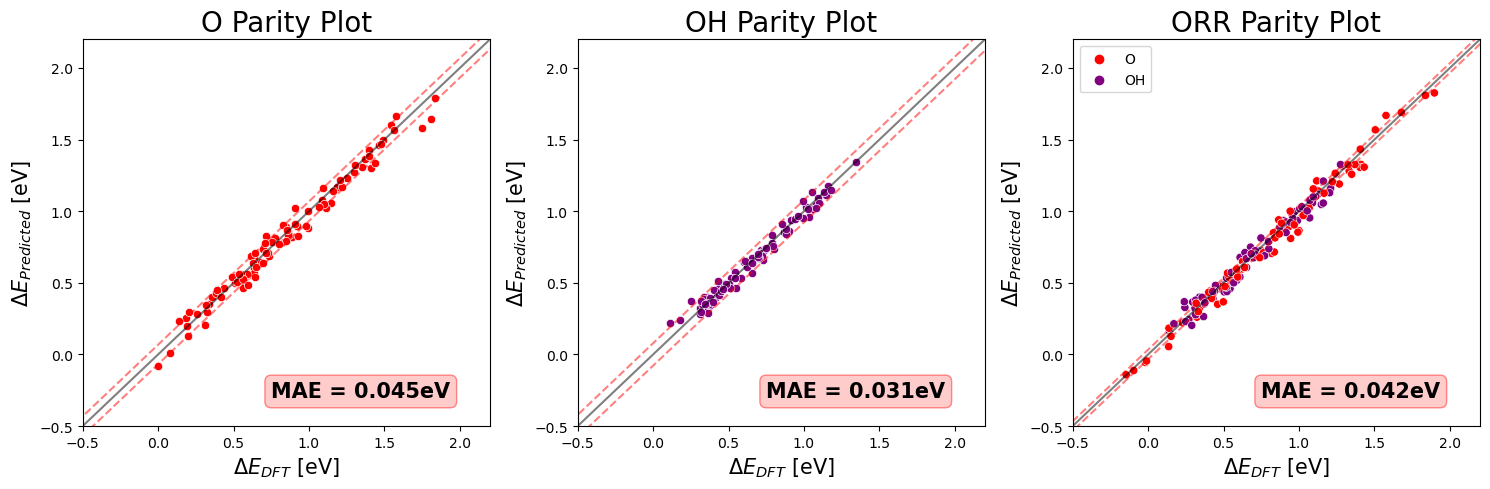

In [285]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

#sns.set(font_scale = 1.5)
ranges=(-0.5,2.2)

x1=sns.scatterplot(ax=axes[0],data=O, x='target',y='prediction',marker='o', color='red')
x1.set(xlim=ranges)
x1.set(ylim=ranges)
x1.plot([-4,4],[-4,4],color='black',alpha=0.5) 
x1=sns.lineplot(ax=axes[0],x='x',y='lines',data=df1,color='red',alpha  = 0.5)
x1.lines[1].set_linestyle("--")
x1=sns.lineplot(ax=axes[0],x='x',y='lines',data=df2,color='red',alpha  = 0.5)
x1.lines[2].set_linestyle("--")
x1.set_xlabel("$\Delta E_{DFT}$ [eV]", fontsize = 15)
x1.set_ylabel("$\Delta E_{Predicted}$ [eV]", fontsize = 15)
x1.set_title("O Parity Plot", fontsize = 20)
x1.text(0.75, -0.3,'MAE = 0.045eV', 
        fontsize=15,
        bbox=dict(boxstyle="round",ec=(1., 0.5, 0.5),
                  fc=(1., 0.8, 0.8)),
       weight='semibold')

x2=sns.scatterplot(ax=axes[1],data=OH, x='target',y='prediction',marker='o', color='purple')
x2.set(xlim=ranges)
x2.set(ylim=ranges)
x2.plot([-4,4],[-4,4],color='black',alpha=0.5) 
x2=sns.lineplot(ax=axes[1],x='x',y='lines',data=df3,color='red',alpha  = 0.5)
x2.lines[1].set_linestyle("--")
x2=sns.lineplot(ax=axes[1],x='x',y='lines',data=df4,color='red',alpha  = 0.5)
x2.lines[2].set_linestyle("--")
x2.set_xlabel("$\Delta E_{DFT}$ [eV]", fontsize = 15)
x2.set_ylabel("$\Delta E_{Predicted}$ [eV]", fontsize = 15)
x2.set_title("OH Parity Plot", fontsize = 20)
x2.text(.75, -0.3,'MAE = 0.031eV', 
        fontsize=15,
        bbox=dict(boxstyle="round",ec=(1., 0.5, 0.5),
                  fc=(1., 0.8, 0.8)),
       weight='semibold')

x3=sns.scatterplot(ax=axes[2],data=ORR, x='target',y='prediction',hue='ads',
                   hue_order=['O','OH'],
                   palette=['red','purple'],
                   marker='o', color='orange')
x3.set(xlim=ranges)
x3.set(ylim=ranges)
x3.plot([-4,4],[-4,4],color='black',alpha=0.5) 
x3=sns.lineplot(ax=axes[2],x='x',y='lines',data=df5,color='red',alpha  = 0.5)
x3.lines[1].set_linestyle("--")
x3=sns.lineplot(ax=axes[2],x='x',y='lines',data=df6,color='red',alpha  = 0.5)
x3.lines[2].set_linestyle("--")
x3.set_xlabel("$\Delta E_{DFT}$ [eV]", fontsize = 15)
x3.set_ylabel("$\Delta E_{Predicted}$ [eV]", fontsize = 15)
x3.set_title("ORR Parity Plot", fontsize = 20)
x3.text(0.75, -0.3,'MAE = 0.042eV', 
        fontsize=15,
        bbox=dict(boxstyle="round",ec=(1., 0.5, 0.5),
                  fc=(1., 0.8, 0.8)),
       weight='semibold')

plt.tight_layout()

plt.savefig('ORR_fig_new')

## All data combined 

In [90]:
#all_data = pd.read_csv('full/prediction_results_test_set.csv')

In [198]:
All= pd.read_csv('pred_results.csv')

CO_pred = All[All['ads']=='CO']
CO_pred = CO_pred[CO_pred['pred_or_label']=='pred']
CO_label = All[All['ads']=='CO']
CO_label = CO_label[CO_label['pred_or_label']=='label']

CHO_pred = All[All['ads']=='CHO']
CHO_pred = CHO_pred[CHO_pred['pred_or_label']=='pred']
CHO_label = All[All['ads']=='CHO']
CHO_label = CHO_label[CHO_label['pred_or_label']=='label']

COOH_pred = All[All['ads']=='COOH']
COOH_pred = COOH_pred[COOH_pred['pred_or_label']=='pred']
COOH_label = All[All['ads']=='COOH']
COOH_label = COOH_label[COOH_label['pred_or_label']=='label']

O_pred = All[All['ads']=='O']
O_pred = O_pred[O_pred['pred_or_label']=='pred']
O_label = All[All['ads']=='O']
O_label = O_label[O_label['pred_or_label']=='label']

OH_pred = All[All['ads']=='OH']
OH_pred = OH_pred[OH_pred['pred_or_label']=='pred']
OH_label = All[All['ads']=='OH']
OH_label = OH_label[OH_label['pred_or_label']=='label']

new_system_pred = All[All['ads']=='New System']
new_system_pred = new_system_pred[new_system_pred['pred_or_label']=='pred']
new_system_label = All[All['ads']=='New System']
new_system_label = new_system_label[new_system_label['pred_or_label']=='label']

all_pred = All[All['pred_or_label']=='pred']
all_pred = all_pred[all_pred['ads']!='New System']
all_label = All[All['pred_or_label']=='label']
all_label = all_label[all_label['ads']!='New System']

all_pred = All[All['pred_or_label']=='pred']
all_label = All[All['pred_or_label']=='label']

In [199]:
def make_dataset_full(Pred,Label):
    ids=[]
    target=[]
    pred=[]
    ads=[]


    for i in range(Pred.shape[0]):
        line1 = Pred.iloc[i]
        if i%25  == 0:
            print(i)
        for j in range(Label.shape[0]):
            line2 = Label.iloc[j]

            if line1['file_name'] == line2['file_name']:
                ids.append(line1['file_name'])
                ads.append(line1['ads'])

                pred.append(line1['Eads'])
                target.append(line2['Eads'])

    d ={'id':ids,'target':target,'prediction':pred,'ads':ads}
    test=pd.DataFrame(d)
    #print(test.shape)
    return test

test = make_dataset_full(all_pred,all_label)

0
25
50
75
100
125
150
175
200
225
250
275
300
325
350
375
400
425
450
475
500
525
550
575
600
625
650
675
700
725
750
775
800
825
850
875
900
925
950
975
1000
1025
1050
1075
1100
1125
1150
1175
1200
1225
1250
1275
1300
1325
1350
1375
1400
1425
1450
1475
1500
1525
1550
1575
(1583, 4)


In [206]:
all_data = test
all_data.head()

,id,target,prediction,ads
0,POSCAR_CHO_364.vasp,-1.574085,-1.705874,CHO
1,POSCAR_CHO_413.vasp,-1.267363,-1.261313,CHO
2,POSCAR_CHO_385.vasp,-1.495976,-1.328181,CHO
3,POSCAR_CHO_237.vasp,-1.368908,-1.347885,CHO
4,POSCAR_CHO_257.vasp,-1.736072,-1.471663,CHO


In [207]:
print('All MAE: ' + str(mean_absolute_error(all_data['target'], all_data['prediction']))[:5]+'eV')
print('All RMSE: ' + str(mean_squared_error(all_data['target'], all_data['prediction'],squared=False))[:5]+'eV')

All MAE: 0.064eV
All RMSE: 0.093eV


In [224]:
all_test_split = pd.read_csv('full/prediction_results_test_set.csv')

In [233]:
ids=[]
target=[]
pred=[]
ads=[]

for i in range(all_test_split.shape[0]):
    line = all_test_split.iloc[i]
    
    ids.append(line['id'])
    target.append(line['target'])
    pred.append(line['prediction'])
    

    if '_COOH' in line['id']:
        ads.append('COOH')
    elif '_CHO' in line['id']:
        ads.append('CHO')
    elif '_OH' in line['id']:
        ads.append('OH')
    elif '_O_' in line['id']:
        ads.append('O')
    else:
        ads.append('CO')
d ={'id':ids,'target':target,'prediction':pred,'ads':ads}
all_test=pd.DataFrame(d)

In [237]:
preds = all_data['prediction']
reals = all_data['target']
subs = abs(preds - reals)
all_std = np.std(subs)

preds = all_test['prediction']
reals = all_test['target']
subs = abs(preds - reals)
all_test_std = np.std(subs)

#all std lines --------------------
x = [-2.8,2.8]
y = [-2.8-all_std,2.8-all_std]
hue=['low','low']
d1 = {'x':x,'lines': y,'hue':hue}
df1 = pd.DataFrame(data=d1)

x = [-2.8,2.8]
y = [-2.8+all_std,2.8+all_std]
hue=['up','up']
d2 = {'x':x,'lines': y,'hue':hue}
df2 = pd.DataFrame(data=d2)
#---------------------------------

#all std lines --------------------
x = [-2.8,2.8]
y = [-2.8-all_test_std,2.8-all_test_std]
hue=['low','low']
d3 = {'x':x,'lines': y,'hue':hue}
df3 = pd.DataFrame(data=d3)

x = [-2.8,2.8]
y = [-2.8+all_test_std,2.8+all_test_std]
hue=['up','up']
d4 = {'x':x,'lines': y,'hue':hue}
df4 = pd.DataFrame(data=d4)
#---------------------------------

In [245]:
all_test.shape,all_data.shape

((91, 4), (1583, 4))

In [256]:
print('All MAE: ' + str(mean_absolute_error(all_data['target'], all_data['prediction']))[:5]+'eV')
print('All MAE: ' + str(mean_absolute_error(all_test['target'], all_test['prediction']))[:5]+'eV')

All MAE: 0.064eV
All MAE: 0.066eV


In [244]:
#sns.set(font_scale = 1.5)
'''ranges=(-2.8,2.8)

sns.scatterplot(data=all_data, x='target',y='prediction',marker='o', color='b'
                  ,hue='ads')
sns.xlim=ranges
sns.ylim=ranges
plt.plot([-2.8,2.8],[-2.8,2.8],color='black',alpha=0.5) 
sns.lineplot(x='x',y='lines',data=df1,color='red',alpha  = 0.5,
             linestyle="--")
sns.lineplot(x='x',y='lines',data=df2,color='red',alpha  = 0.5,
             linestyle="--")
plt.xlabel("$\Delta E_{DFT}$ [eV]", fontsize = 15)
plt.ylabel("$\Delta E_{Predicted}$ [eV]", fontsize = 15)
plt.title("All Parity Plot", fontsize = 20)
plt.text(-0.3, -2.5,'MAE = 0.074eV', 
        fontsize=15,
        bbox=dict(boxstyle="round",ec=(1., 0.5, 0.5),
                  fc=(1., 0.8, 0.8)),
       weight='semibold')
ax = plt.gca()
ax.set_aspect('equal')
plt.figure(figsize=(15,15))
plt.show()
plt.tight_layout()'''
#plt.savefig('All_pp_plot.png')

'ranges=(-2.8,2.8)\n\nsns.scatterplot(data=all_data, x=\'target\',y=\'prediction\',marker=\'o\', color=\'b\'\n                  ,hue=\'ads\')\nsns.xlim=ranges\nsns.ylim=ranges\nplt.plot([-2.8,2.8],[-2.8,2.8],color=\'black\',alpha=0.5) \nsns.lineplot(x=\'x\',y=\'lines\',data=df1,color=\'red\',alpha  = 0.5,\n             linestyle="--")\nsns.lineplot(x=\'x\',y=\'lines\',data=df2,color=\'red\',alpha  = 0.5,\n             linestyle="--")\nplt.xlabel("$\\Delta E_{DFT}$ [eV]", fontsize = 15)\nplt.ylabel("$\\Delta E_{Predicted}$ [eV]", fontsize = 15)\nplt.title("All Parity Plot", fontsize = 20)\nplt.text(-0.3, -2.5,\'MAE = 0.074eV\', \n        fontsize=15,\n        bbox=dict(boxstyle="round",ec=(1., 0.5, 0.5),\n                  fc=(1., 0.8, 0.8)),\n       weight=\'semibold\')\nax = plt.gca()\nax.set_aspect(\'equal\')\nplt.figure(figsize=(15,15))\nplt.show()\nplt.tight_layout()'

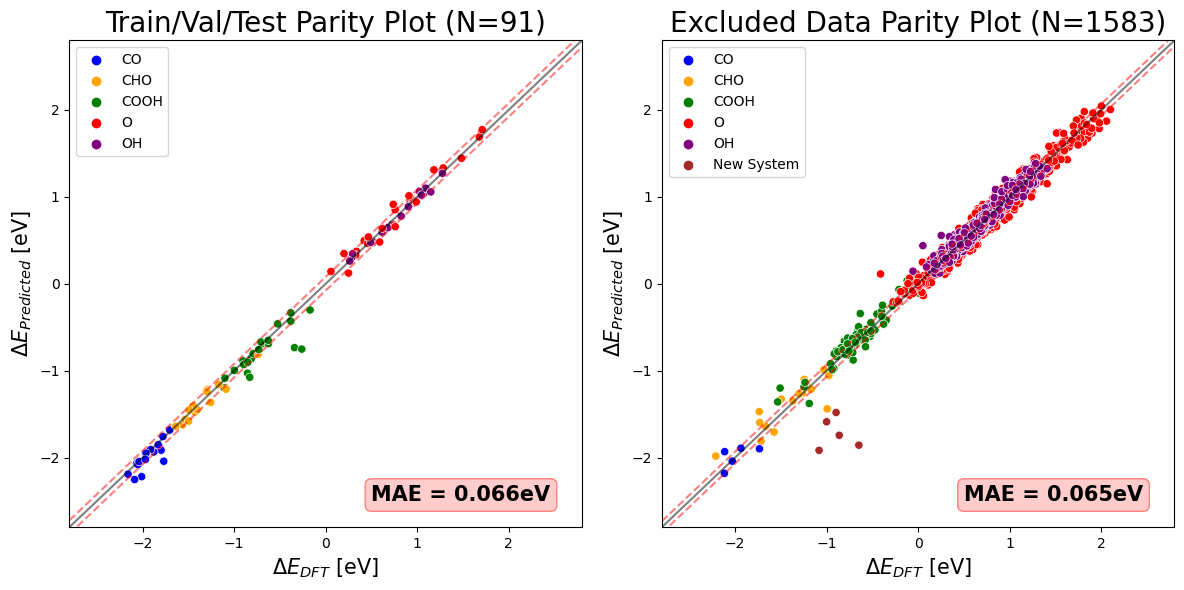

In [286]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

#sns.set(font_scale = 1.5)
ranges=(-2.8,2.8)

x1=sns.scatterplot(ax=axes[1],data=all_data, x='target',y='prediction',
                   hue='ads',
                   hue_order=['CO','CHO','COOH','O','OH','New System'],
                   palette=['blue','orange','green','red','purple','brown'],
                   marker='o', color='b')
x1.set(xlim=ranges)
x1.set(ylim=ranges)
x1.plot([-4,4],[-4,4],color='black',alpha=0.5) 
x1=sns.lineplot(ax=axes[1],x='x',y='lines',data=df1,color='red',alpha  = 0.5)
x1.lines[1].set_linestyle("--")
x1=sns.lineplot(ax=axes[1],x='x',y='lines',data=df2,color='red',alpha  = 0.5)
x1.lines[2].set_linestyle("--")
x1.set_xlabel("$\Delta E_{DFT}$ [eV]", fontsize = 15)
x1.set_ylabel("$\Delta E_{Predicted}$ [eV]", fontsize = 15)
x1.set_title("Excluded Data Parity Plot (N=1583)", fontsize = 20)
x1.text(.5, -2.5,'MAE = 0.065eV', 
        fontsize=15,
        bbox=dict(boxstyle="round",ec=(1., 0.5, 0.5),
                  fc=(1., 0.8, 0.8)),
       weight='semibold')


x2=sns.scatterplot(ax=axes[0],data=all_test, x='target',y='prediction',
                   hue='ads',
                   hue_order=['CO','CHO','COOH','O','OH'],
                   palette=['blue','orange','green','red','purple'],
                   marker='o', color='green')
x2.set(xlim=ranges)
x2.set(ylim=ranges)
x2.plot([-4,4],[-4,4],color='black',alpha=0.5) 
x2=sns.lineplot(ax=axes[0],x='x',y='lines',data=df3,color='red',alpha  = 0.5)
x2.lines[1].set_linestyle("--")
x2=sns.lineplot(ax=axes[0],x='x',y='lines',data=df4,color='red',alpha  = 0.5)
x2.lines[2].set_linestyle("--")
x2.set_xlabel("$\Delta E_{DFT}$ [eV]", fontsize = 15)
x2.set_ylabel("$\Delta E_{Predicted}$ [eV]", fontsize = 15)
x2.set_title("Train/Val/Test Parity Plot (N=91)", fontsize = 20)
x2.text(.5, -2.5,'MAE = 0.066eV', 
        fontsize=15,
        bbox=dict(boxstyle="round",ec=(1., 0.5, 0.5),
                  fc=(1., 0.8, 0.8)),
       weight='semibold')

plt.tight_layout()
#ax = plt.gca()
#ax.set_aspect('equal')
plt.savefig('Final_fig_new')

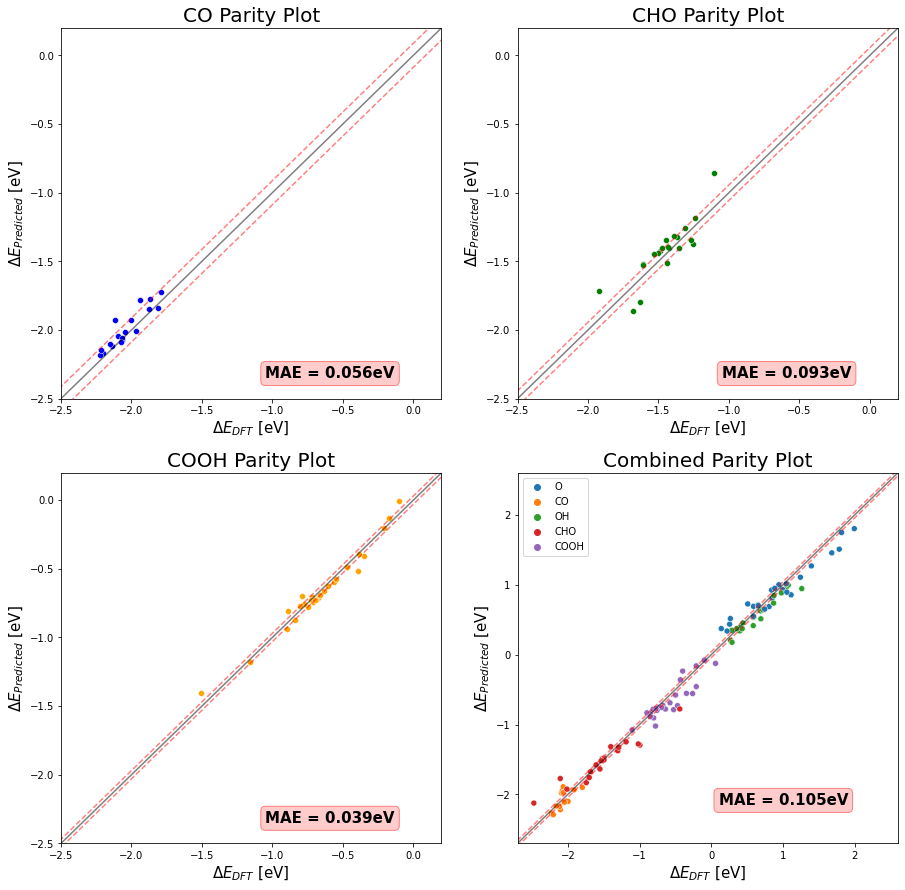

In [66]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

#sns.set(font_scale = 1.5)

x1=sns.scatterplot(ax=axes[0,0],data=CO, x='target',y='prediction',marker='o', color='b')
x1.set(xlim=(-2.5,0.2))
x1.set(ylim=(-2.5,0.2))
x1.plot([-4,4],[-4,4],color='black',alpha=0.5) 
x1=sns.lineplot(ax=axes[0,0],x='x',y='lines',data=df1,color='red',alpha  = 0.5)
x1.lines[1].set_linestyle("--")
x1=sns.lineplot(ax=axes[0,0],x='x',y='lines',data=df2,color='red',alpha  = 0.5)
x1.lines[2].set_linestyle("--")
x1.set_xlabel("$\Delta E_{DFT}$ [eV]", fontsize = 15)
x1.set_ylabel("$\Delta E_{Predicted}$ [eV]", fontsize = 15)
x1.set_title("CO Parity Plot", fontsize = 20)
x1.text(-1.05,-2.35,'MAE = 0.056eV',
        fontsize=15,bbox=dict(boxstyle="round",ec=(1., 0.5, 0.5),
                              fc=(1., 0.8, 0.8)),
        weight='semibold')

x2=sns.scatterplot(ax=axes[0,1],data=CHO, x='target',y='prediction',marker='o', color='green')
x2.set(xlim=(-2.5,0.2))
x2.set(ylim=(-2.5,0.2))
x2.plot([-4,4],[-4,4],color='black',alpha=0.5) 
x2=sns.lineplot(ax=axes[0,1],x='x',y='lines',data=df3,color='red',alpha  = 0.5)
x2.lines[1].set_linestyle("--")
x2=sns.lineplot(ax=axes[0,1],x='x',y='lines',data=df4,color='red',alpha  = 0.5)
x2.lines[2].set_linestyle("--")
x2.set_xlabel("$\Delta E_{DFT}$ [eV]", fontsize = 15)
x2.set_ylabel("$\Delta E_{Predicted}$ [eV]", fontsize = 15)
x2.set_title("CHO Parity Plot", fontsize = 20)
x2.text(-1.05,-2.35,'MAE = 0.093eV',
        fontsize=15,bbox=dict(boxstyle="round",ec=(1., 0.5, 0.5),
                              fc=(1., 0.8, 0.8)),
        weight='semibold')

x3=sns.scatterplot(ax=axes[1,0],data=COOH, x='target',y='prediction',marker='o', color='orange')
x3.set(xlim=(-2.5,0.2))
x3.set(ylim=(-2.5,0.2))
x3.plot([-4,4],[-4,4],color='black',alpha=0.5) 
x3=sns.lineplot(ax=axes[1,0],x='x',y='lines',data=df5,color='red',alpha  = 0.5)
x3.lines[1].set_linestyle("--")
x3=sns.lineplot(ax=axes[1,0],x='x',y='lines',data=df6,color='red',alpha  = 0.5)
x3.lines[2].set_linestyle("--")
x3.set_xlabel("$\Delta E_{DFT}$ [eV]", fontsize = 15)
x3.set_ylabel("$\Delta E_{Predicted}$ [eV]", fontsize = 15)
x3.set_title("COOH Parity Plot", fontsize = 20)
x3.text(-1.05,-2.35,'MAE = 0.039eV',
        fontsize=15,bbox=dict(boxstyle="round",ec=(1., 0.5, 0.5),
                              fc=(1., 0.8, 0.8)),
        weight='semibold')

x4=sns.scatterplot(ax=axes[1,1],data=df_all, x='target',y='prediction',hue='ads',marker='o', color='b')
x4.set(xlim=(-2.7,2.6))
x4.set(ylim=(-2.7,2.6))
x4.plot([-4,4],[-4,4],color='black',alpha=0.5) 
x4=sns.lineplot(ax=axes[1,1],x='x',y='lines',data=df7,color='red',alpha  = 0.5)
x4.lines[1].set_linestyle("--")
x4=sns.lineplot(ax=axes[1,1],x='x',y='lines',data=df8,color='red',alpha  = 0.5)
x4.lines[2].set_linestyle("--")
x4.set_xlabel("$\Delta E_{DFT}$ [eV]", fontsize = 15)
x4.set_ylabel("$\Delta E_{Predicted}$ [eV]", fontsize = 15)
x4.set_title("Combined Parity Plot", fontsize = 20)
x4.text(0.1,-2.15,'MAE = 0.105eV',
        fontsize=15,bbox=dict(boxstyle="round",ec=(1., 0.5, 0.5),
                              fc=(1., 0.8, 0.8)),
        weight='semibold')

plt.savefig('all_fig')

In [288]:
import matplotlib.pyplot as plt
from ase.visualize.plot import plot_atoms
import networkx as nx
#from torch_geometric.utils import from_networkx, to_networkx
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from ase.visualize import view
from ase.io import read, write
import mendeleev
from ase.db import connect
import json
from ase import Atoms
import itertools
import ase
import numpy as np
from scipy.spatial import distance_matrix
#with open('atom_init.json') as f:
#    atom_init = json.load(f)

In [289]:
from ase import neighborlist

In [296]:
with open('atom_init.json') as f:
    atom_init = json.load(f)

In [327]:
def Extract_Ads_geom(atms, adsorbate, plot=False):
    binding_atoms, adsorbate_atoms, bonds = Analyse_surface(atms, adsorbate=adsorbate)

    nl = ase.neighborlist.NeighborList(ase.neighborlist.natural_cutoffs(atms, 1.1), self_interaction=False, 
                              bothways=True, skin=0.25)

    nl.update(atms)


    poss = [atms.positions[i] for i in binding_atoms]
    symbols = [atms[i].symbol for i in binding_atoms]


    distances =atms.get_all_distances(mic=True)



    # neighbor_distances = np.array([distances[index][n] for n in neighbors])

    for atm in  binding_atoms:
        neighbors, offsets = nl.get_neighbors(atm)

        for i, offset in zip(neighbors, offsets):
            poss.append(atms.positions[i] + np.dot(offset, atms.get_cell()))
            symbols.append(atms[i].symbol)


    for atm in  adsorbate_atoms:
        poss.append(atms.positions[atm])
        symbols.append(atms[atm].symbol)

    coords = np.vstack(poss) 


    surf_n = Atoms(symbols,positions=coords )
    ase.geometry.get_duplicate_atoms(surf_n, cutoff=0.1, delete=True)
    if plot:
        fig, ax = plt.subplots(1,2)
        plot_atoms(surf_n,ax[0],radii=0.9, rotation=('0x,0y,0z'))
        plot_atoms(surf_n,ax[1],radii=0.9, rotation=('-90x,45y,0z'))
    
    params = {"binding_atoms":binding_atoms,
            "adsorbate_atoms":adsorbate_atoms,
            "bonds":bonds}
    
    
    adsorbate_atms = [atom.index for atom in surf_n if atom.symbol in adsorbate]
    
    
    full = nx.Graph()  
    full.add_nodes_from(range(len(surf_n) ))
    distances = surf_n.get_all_distances(mic=True)
    
    numbers = surf_n.get_atomic_numbers().tolist()
    symbols = surf_n.get_chemical_symbols()

    for i, feat_dict in full.nodes(data=True):
        feat_dict.update({'symbol':  symbols[i]})
        feat_dict.update({'atomic_number':  numbers[i]})
        feat_dict.update({'node_attrs ':  'C'})

    


#    
    comb = list(itertools.combinations([i for i in range(len(surf_n))],2))


    for atm1, atm2 in comb:
        if atm1==atm2:
            continue
        if distances[atm1][atm2] > 2.8 :
            continue

        if distances[atm1][atm2] > 2.3 and (bool(atm1 in adsorbate_atms) ^ bool(atm2 in adsorbate_atms)):
            continue 
        if distances[atm1][atm2] > 2.3 and (bool(atm1 in adsorbate_atms) and bool(atm2 in adsorbate_atms)):
            continue    
        add_atoms_edge(full, surf_n,  atm1, atm2) 
    return surf_n,  full #params

In [293]:
def Analyse_surface(atoms, adsorbate,radii_multiplier=1.1, skin = 0.25):
    
    nl = ase.neighborlist.NeighborList(ase.neighborlist.natural_cutoffs(atoms, radii_multiplier), self_interaction=False, 
                          bothways=True, skin=skin)

    nl.update(atoms)

    adsorbate_atoms = [atom.index for atom in atoms if atom.symbol in adsorbate]
    
    # Add all atoms to graph
    
    distances = atoms.get_all_distances(mic=True)

    binding_atoms = []
    bonds = []
    for index, atom in enumerate(atoms):
        neighbors, offsets = nl.get_neighbors(index)
        for neighbor, offset in zip(neighbors, offsets):
            if np.all(offset==np.zeros(3)):
                if distances[index][neighbor] > 2.5 and (bool(index in adsorbate_atoms) ^ bool(neighbor in adsorbate_atoms)):
                    
                    continue
#                 if bool(index not in adsorbate_atoms) and bool(neighbor not in adsorbate_atoms):
#                     continue
                if (bool(index not in adsorbate_atoms) ^ bool(neighbor not in adsorbate_atoms)) and (index not in adsorbate_atoms):    
                    binding_atoms.append(index)
    
            bonds.append((index, neighbor))
                       
    return binding_atoms, adsorbate_atoms, bonds

In [302]:
#edited to run

#why so complicated??
def bond_symbol(atoms, a1, a2):
    return "{}{}".format(*sorted((atoms[a1].symbol, atoms[a2].symbol)))


def EN(atoms, a1, a2):
    try:
        avg = (mendeleev.element(atoms[a1].symbol).en_pauling + mendeleev.element(atoms[a2].symbol).en_pauling)/2
    except:
        avg = 0.0
    try:
        dif = abs(mendeleev.element(atoms[a1].symbol).en_pauling - mendeleev.element(atoms[a2].symbol).en_pauling)
    except:
        dif = 0
    return np.array([avg, dif])

def node_symbol(atom):
    return "".format(atom.symbol)


def add_atoms_node(graph, atoms, a1):
    graph.add_node(node_symbol(atoms[a1]), index=a1)
    

def add_atoms_edge(graph, atoms, a1, a2):
    graph.add_edge(a1,
                   a2,
#                    edge_attrs = np.hstack([EN(atoms, a1, a2), atoms.get_distance(a1, a2)]),
#                    bond=bond_symbol(atoms, a1, a2),
#                    index='{}:{}'.format(*sorted([a1, a2])),
#                    dist=atoms.get_distance(a1, a2),
                   electronegativity = EN(atoms, a1, a2)
#                    ads_only=0 if (a1 in adsorbate_atoms and a2 in adsorbate_atoms) else 2,
                   )


def add_atoms_edge_2(graph, atoms, a1, a2, b1,b2):
    graph.add_edge(a1,
                   a2,
    #                    edge_attrs = np.hstack([EN(atoms, a1, a2), atoms.get_distance(a1, a2)]),
    #                    bond=bond_symbol(atoms, a1, a2),
    #                    index='{}:{}'.format(*sorted([a1, a2])),
    #                    dist=atoms.get_distance(a1, a2),
                   electronegativity = EN(atoms, b1, b2)
    #                    ads_only=0 if (a1 in adsorbate_atoms and a2 in adsorbate_atoms) else 2,
                   )
    

def Atom2Graph(atoms, adsorbate,radii_multiplier=1.1, skin = 0.25):
    
    nl = ase.neighborlist.NeighborList(ase.neighborlist.natural_cutoffs(atoms, radii_multiplier), self_interaction=False, 
                          bothways=True, skin=skin)

    nl.update(atoms)

    adsorbate_atoms = [atom.index for atom in atoms if atom.symbol in adsorbate]
    
    # Add all atoms to graph
    
    distances = atoms.get_all_distances(mic=True)
    full = nx.Graph()
    full.add_nodes_from(range(len(atoms)))
    for i, feat_dict in full.nodes(data=True):
                feat_dict.update({'symbol':  atoms[i].symbol})
                feat_dict.update({'index':  i})
                feat_dict.update({'node_attrs ':  atom_init[atoms[i].symbol]})
                feat_dict.update({'pos ':  atoms.positions[i]})
    
#     O_H_bonded = find_H_bonds(atoms, adsorbate_atoms)
#     print(O_H_bonded)
#     for ind,i in enumerate(full.nodes(data=True)):
#         if i[1]['index'] in O_H_bonded:
#             full.nodes[str(list(full.nodes)[ind])]['H_bond'] = 1
    
    # Add all edges to graph
    binding_atoms = []
    for index, atom in enumerate(atoms):
        neighbors, offsets = nl.get_neighbors(index)
        for neighbor, offset in zip(neighbors, offsets):
            if np.all(offset==np.zeros(3)):
                if distances[index][neighbor] > 2.5 and (bool(index in adsorbate_atoms) ^ bool(neighbor in adsorbate_atoms)):
                    
                    continue
#                 if bool(index not in adsorbate_atoms) and bool(neighbor not in adsorbate_atoms):
#                     continue
                if (bool(index not in adsorbate_atoms) ^ bool(neighbor not in adsorbate_atoms)) and (index not in adsorbate_atoms):    
                    binding_atoms.append(index)
    
#                 print(index, neighbor,distances[index][neighbor])    
                add_atoms_edge(full, atoms, index, neighbor)
                       
    return full,  binding_atoms, adsorbate_atoms
def visualize(h, color=None, labels=None, pos=None):
    
    # Use spring_layout to handle positioning of graph
    if pos is None:
        layout = nx.spring_layout(h, seed=42)
    else:
        layout = pos
    plt.figure(figsize=(7, 7))
    plt.xticks([])
    plt.yticks([])
#     color_map = "tab20"
    color_map = [atoms_colors.get_hex(x) for x in color]
    
    if color is None:
        nx.draw_networkx(h, pos=layout, with_labels=True)

    else:
        sizes = [1000]*len(color)
        nx.draw_networkx(h, pos=layout,
                         labels=labels, node_color=color_map, node_size=sizes)
    plt.show()    

In [315]:
from ase import atom
import atoms_colors

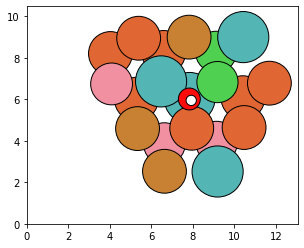

In [41]:
fig, ax = plt.subplots()
plot_atoms(surf_n, ax, radii=0.8, rotation=('0x,0y,0z'))
plt.savefig('dft_datapoint')

In [67]:
all_data = pd.read_csv('Zach_2/prediction_results_test_set.csv')
ORR_identifier = pd.read_csv('Zach_2/ORR_ads_classifier.csv')
#ORR_identifier = ORR_identifier[['file_names','ads']]
CO2RR_identifier = pd.read_csv('Zach_2/co2rr_ads_classifier.csv')
CO2RR_identifier = CO2RR_identifier[['file_names','ads']]

id_list = list(all_data['id'])
target_list = list(all_data['target'])
pred_list = list(all_data['prediction'])
ads_list = []

for i in range(all_data.shape[0]):
    line = all_data.iloc[i]
    file = line['id']
    
    if 'CO2RR' in file: #COOH or CHO
        for j in range(CO2RR_identifier.shape[0]):
            if file == CO2RR_identifier.iloc[j]['file_names']:
                ads_list.append(CO2RR_identifier.iloc[j]['ads'])
        
    elif 'ORR' in file: #OH or H
        for j in range(ORR_identifier.shape[0]):
            if file == ORR_identifier.iloc[j]['file_names']:
                ads_list.append(ORR_identifier.iloc[j]['ads'])
        
    else: #CO
        ads_list.append('CO')
     
id_list.append('0_OH_hollow_CONTCAR.vasp')
target_list.append(-1.00013855)
pred_list.append(-2.019985914)
ads_list.append('Combined Dataset Datapoint')
    
dic = {'file_names': id_list, 'ads': ads_list,'target':target_list,
       'prediction':pred_list}  
df_all = pd.DataFrame(dic)



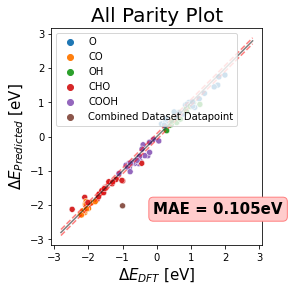

<Figure size 1080x1080 with 0 Axes>

In [68]:
#sns.set(font_scale = 1.5)
ranges=(-2.8,2.8)

sns.scatterplot(data=df_all, x='target',y='prediction',marker='o', color='b'
                  ,hue='ads')
sns.xlim=ranges
sns.ylim=ranges
plt.plot([-2.8,2.8],[-2.8,2.8],color='black',alpha=0.5) 
sns.lineplot(x='x',y='lines',data=df1,color='red',alpha  = 0.5,
             linestyle="--")
sns.lineplot(x='x',y='lines',data=df2,color='red',alpha  = 0.5,
             linestyle="--")
plt.xlabel("$\Delta E_{DFT}$ [eV]", fontsize = 15)
plt.ylabel("$\Delta E_{Predicted}$ [eV]", fontsize = 15)
plt.title("All Parity Plot", fontsize = 20)
plt.text(-0.1, -2.25,'MAE = 0.105eV', 
        fontsize=15,
        bbox=dict(boxstyle="round",ec=(1., 0.5, 0.5),
                  fc=(1., 0.8, 0.8)),
       weight='semibold')
ax = plt.gca()
ax.set_aspect('equal')
plt.figure(figsize=(15,15))
plt.show()
#plt.tight_layout()